### 19장 이어서 - 오토인코더

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.3034 - val_loss: 0.1368
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.1325 - val_loss: 0.1181
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.1171 - val_loss: 0.1112
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.1108 - val_loss: 0.1063
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1067 - val_loss: 0.1033
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.1040 - val_loss: 0.1012
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.1019 - val_loss: 0.0996
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1005 - val_loss: 0.0983
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0991 - val_loss: 0.0967
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0977 - val_loss: 0.0957
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0968 - val_loss: 0.0947
Epoch 12/50
469/469 ━━━━━━━━━━━━━━

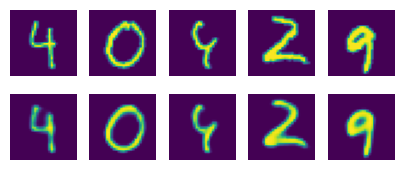

In [8]:
# MNIST 데이터셋 load
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델을 생성
autoencoder = Sequential()

# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인(요약)
# autoencoder.summary()

# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러온다
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣는다

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정한다

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열한다
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여준다
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력한다
   ax.axis('off')
plt.show()